<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book2/08/hmm_casino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# The "occasionally dishonest casino" HMM

We use the [ssm-jax](https://github.com/probml/ssm-jax/blob/main/ssm_jax/) library.



In [1]:
%pip install -qq git+https://github.com/probml/ssm-jax.git

     |████████████████████████████████| 140 kB 21.9 MB/s 
     |████████████████████████████████| 72 kB 515 kB/s 
     |████████████████████████████████| 272 kB 54.7 MB/s 


In [2]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

Printing sample observed/latent...
obs:  111111111122221111111111111111111111222222222122221111111111
hid:  135553452655336631635155152623211211346222126326426542234464
Log likelihood:  -523.9222
most likely states: 111111111111111111111111111111111111111111111111111111111111
hmm_casino_filter.pdf
hmm_casino_smooth.pdf
hmm_casino_map.pdf


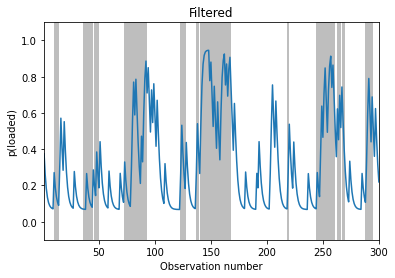

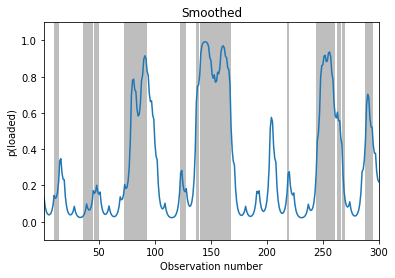

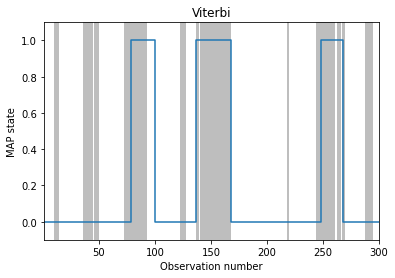

In [3]:
try:
    from ssm_jax.hmm.demos.casino_hmm import make_model_and_data, plot_results
except ModuleNotFoundError:
    %pip install -qq ssm_jax
    from ssm_jax.hmm.demos.casino_hmm import make_model_and_data, plot_results

hmm, true_states, emissions = make_model_and_data()
posterior = hmm.smoother(emissions)
most_likely_states = hmm.most_likely_states(emissions)
dict_figures = plot_results(true_states, emissions, posterior, most_likely_states)

for k, v in dict_figures.items():
    fname = k + ".pdf"
    print(fname)
    fig = v
    fig.savefig(fname)